# Business Understanding

![Water well](Beast.JPG)

# Introduction

Located in Eastern Africa, Tanzania has a population of about 66 million people (2023 est.), and is the largest country in East Africa.

It however faces a significant challenge as around 26 million inhabitants lack direct access to clean water. The necessity to travel for kilometers to obtain this vital resource worsens the adverse consequences of water scarcity. <br>
This situation has given rise to a hampered agricultural sector, severe health problems and high infant mortality rates, contributing to economic stagnation. <br>
In response to these challenges, the Tanzanian government, along with NGOs and individuals, has over the years built water well projects to alleviate the crisis. Nevertheless, there is a pressing concern regarding the effectiveness of these endeavors. 

This project aims to utilize machine learning and data visualization to identify potential issues with existing water well projects, forecast the success of new initiatives, and allocate funds strategically for maximum impact in areas where urgent intervention is needed.

# Problem Statement

After successfully undertaking a personal mission to construct over 100 wells in Kenya, the philanthropist and YouTuber Jimmy Donaldson, popularly known as 'Mr. Beast,' is now gearing up for a similar venture in Tanzania. Teaming up with the UN-Habitat, his organization 'Beast Philanthropy' aims to contribute to sustainable development by ensuring clean water access for communities, aligning with SDG 6: Clean water and sanitation.

While recognizing Tanzania's recent efforts to enhance clean water accessibility, the UN-Habitat acknowledges that a significant portion of the population still lacks safe water access. To address this, an initiative is being proposed to evaluate the distribution of wells in Tanzania and assess the functionality of water pumps in existing wells. The wells in Tanzania can be categorized as functional, non-functional, or in need of repair.

As part of Beast Philanthropy's initiative, my task involves developing a classification model to predict whether a well falls into the categories of functional, non-functional, or in need of repair.

# Metric of Success

The model to have an accuracy of atleast 70%

# Objectives

**Primary Objective:**

To deliver accurate predictions regarding the operational status of wells.

**Specific Objectives:**
1. To determine what is the quality of Water in Tanzania
2. To determine who are the top 5 Installers of water wells in Tanzania
3. To determine the functionality status with respect to payment type
4. To determine the condition of a waterpoint pump based on age
5. To identify which installer results in the most nonfunctional waterpoint pumps
6. To identify the most popular extraction type 

# Importing libraries

In [1]:
# Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation Metrics
from sklearn.metrics import (
    precision_score, recall_score, log_loss, ConfusionMatrixDisplay,
    accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,
    classification_report
)

# Feature Engineering and data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Model Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Maps visualization
import folium 
from folium.plugins import StripePattern
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

# Model Deployment
import pickle

# Data Understanding

The target variable in this dataset is status_group with the following labels:

*functional - the waterpoint is operational and there are no repairs needed

*functional needs repair - the waterpoint is operational, but needs repairs

*non functional - the waterpoint is not operational

## Data Source

The data can be downloaded from the link: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/.

We are provided with 4 CSV files as follows:

    1. train.csv
    2. test.csv
    3. train_labels.csv
    4. SubmissionFormat.csv
The train dataset has 59400 datapoints and 40 features

In [2]:
# Import all the well data
X_df = pd.read_csv("./Training_set_values.csv", index_col='id')
y_df = pd.read_csv("./Training_set_labels.csv", index_col='id')

X_submission = pd.read_csv("./Test_set_values.csv")

In [3]:
# Merge target columns df and features df in order to change target values into numerical object
train_df = pd.merge(y_df, X_df, how='inner', on='id')
train_df

status_group  amount_tsh date_recorded           funder  gps_height  \
id                                                                             
69572      functional      6000.0    2011-03-14            Roman        1390   
8776       functional         0.0    2013-03-06          Grumeti        1399   
34310      functional        25.0    2013-02-25     Lottery Club         686   
67743  non functional         0.0    2013-01-28           Unicef         263   
19728      functional         0.0    2011-07-13      Action In A           0   
...               ...         ...           ...              ...         ...   
60739      functional        10.0    2013-05-03  Germany Republi        1210   
27263      functional      4700.0    2011-05-07      Cefa-njombe        1212   
37057      functional         0.0    2011-04-11              NaN           0   
31282      functional         0.0    2011-03-08            Malec           0   
26348      functional         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
id                                                                             
69572         Roman  34.938093  -9.856322                  none            0   
8776        GRUMETI  34.698766  -2.147466              Zahanati            0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi            0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728       Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
60739           CES  37.169807  -3.253847   Area Three Namba 27            0   
27263          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
37057           NaN  34.017087  -8.750434               Mashine            0   
31282          Musa  35.861315  -6.378573                Mshoro            0   
26348         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... payment_type water_quality quality_group      quantity  \
id     ...                                                          
69572  ...     annually          soft          good        enough   
8776   ...    never pay          soft          good  insufficient   
34310  ...   per bucket          soft          good        enough   
67743  ...    never pay          soft          good           dry   
19728  ...    never pay          soft          good      seasonal   
...    ...          ...           ...           ...           ...   
60739  ...   per bucket          soft          good        enough   
27263  ...     annually          soft          good        enough   
37057  ...      monthly      fluoride      fluoride        enough   
31282  ...    never pay          soft          good  insufficient   
26348  ...   on failure         salty         salty        enough   

       quantity_group                source           source_type  \
id                                                                  
69572          enough                spring                spring   
8776     insufficient  rainwater harvesting  rainwater harvesting   
34310          enough                   dam                   dam   
67743             dry           machine dbh              borehole   
19728        seasonal  rainwater harvesting  rainwater harvesting   
...               ...                   ...                   ...   
60739          enough                spring                spring   
27263          enough                 river            river/lake   
37057          enough           machine dbh              borehole   
31282    insufficient          shallow well          shallow well   
26348          enough          shallow well          shallow well   

       source_class              waterpoint_type waterpoint_type_group  
id                                                        

In [4]:
# Change target values to numeric values
train_df['status'] = train_df.status_group.map({"non functional":0, "functional needs repair":1, "functional":2})
train_df

status_group  amount_tsh date_recorded           funder  gps_height  \
id                                                                             
69572      functional      6000.0    2011-03-14            Roman        1390   
8776       functional         0.0    2013-03-06          Grumeti        1399   
34310      functional        25.0    2013-02-25     Lottery Club         686   
67743  non functional         0.0    2013-01-28           Unicef         263   
19728      functional         0.0    2011-07-13      Action In A           0   
...               ...         ...           ...              ...         ...   
60739      functional        10.0    2013-05-03  Germany Republi        1210   
27263      functional      4700.0    2011-05-07      Cefa-njombe        1212   
37057      functional         0.0    2011-04-11              NaN           0   
31282      functional         0.0    2011-03-08            Malec           0   
26348      functional         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
id                                                                             
69572         Roman  34.938093  -9.856322                  none            0   
8776        GRUMETI  34.698766  -2.147466              Zahanati            0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi            0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728       Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
60739           CES  37.169807  -3.253847   Area Three Namba 27            0   
27263          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
37057           NaN  34.017087  -8.750434               Mashine            0   
31282          Musa  35.861315  -6.378573                Mshoro            0   
26348         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
id     ...                                                             
69572  ...          soft          good        enough          enough   
8776   ...          soft          good  insufficient    insufficient   
34310  ...          soft          good        enough          enough   
67743  ...          soft          good           dry             dry   
19728  ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
60739  ...          soft          good        enough          enough   
27263  ...          soft          good        enough          enough   
37057  ...      fluoride      fluoride        enough          enough   
31282  ...          soft          good  insufficient    insufficient   
26348  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
id                                                               
69572                spring                spring  groundwater   
8776   rainwater harvesting  rainwater harvesting      surface   
34310                   dam                   dam      surface   
67743           machine dbh              borehole  groundwater   
19728  rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
60739                spring                spring  groundwater   
27263                 river            river/lake      surface   
37057           machine dbh              borehole  groundwater   
31282          shallow well          shallow well  groundwater   
26348          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group status  
id                                                               

In [5]:
# summary of numeric columns
train_df.describe()

amount_tsh    gps_height     longitude      latitude   num_private  \
count   59400.000000  59400.000000  59400.000000  5.940000e+04  59400.000000   
mean      317.650385    668.297239     34.077427 -5.706033e+00      0.474141   
std      2997.574558    693.116350      6.567432  2.946019e+00     12.236230   
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000   
25%         0.000000      0.000000     33.090347 -8.540621e+00      0.000000   
50%         0.000000    369.000000     34.908743 -5.021597e+00      0.000000   
75%        20.000000   1319.250000     37.178387 -3.326156e+00      0.000000   
max    350000.000000   2770.000000     40.345193 -2.000000e-08   1776.000000   

        region_code  district_code    population  construction_year  \
count  59400.000000   59400.000000  59400.000000       59400.000000   
mean      15.297003       5.629747    179.909983        1300.652475   
std       17.587406       9.633649    471.482176         951.620547   
min        1.000000       0.000000      0.000000           0.000000   
25%        5.000000       2.000000      0.000000           0.000000   
50%       12.000000       3.000000     25.000000        1986.000000   
75%       17.000000       5.000000    215.000000        2004.000000   
max       99.000000      80.000000  30500.000000        2013.000000   

             status  
count  59400.000000  
mean       1.158838  
std        0.949794  
min        0.000000  
25%        0.000000  
50%        2.000000  
75%        2.000000  
max        2.000000

In [6]:
# Checking for Nan and null values in our dataset
train_df.isna().sum()

status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

We can see that there are columns with lots of null values, while also having some columns duplicating already existing columns but with different column names.

In [7]:
#checking for unique values
dict = {}
dfp = train_df.copy().drop(['status_group', 'status'], axis =1)
# Seeing how many unique values are in each features 
for x in dfp.columns:
    if dfp[x].dtypes == 'object':
        dict[x] = len(dfp[x].value_counts())
dict

{'date_recorded': 356,
 'funder': 1897,
 'installer': 2145,
 'wpt_name': 37400,
 'basin': 9,
 'subvillage': 19287,
 'region': 21,
 'lga': 125,
 'ward': 2092,
 'public_meeting': 2,
 'recorded_by': 1,
 'scheme_management': 12,
 'scheme_name': 2696,
 'permit': 2,
 'extraction_type': 18,
 'extraction_type_group': 13,
 'extraction_type_class': 7,
 'management': 12,
 'management_group': 5,
 'payment': 7,
 'payment_type': 7,
 'water_quality': 8,
 'quality_group': 6,
 'quantity': 5,
 'quantity_group': 5,
 'source': 10,
 'source_type': 7,
 'source_class': 3,
 'waterpoint_type': 7,
 'waterpoint_type_group': 6}

In [8]:
#function to get value counts
def get_value_counts(column):
    return train_df[column].value_counts()

In [9]:
# checking for unique values in the target column and their count
get_value_counts('status_group')

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The target values have high class imbalance. 

# quantity / quantity_group columns

In [10]:
# checking for unique values
get_value_counts('quantity')

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [11]:
# checking for unique values
get_value_counts('quantity_group')

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

Checking the two columns, we see that they have exactly similar values. We can remove one column ('quantity') to reduce duplication.

Creating a function to give the count plot:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countplot(df, x_col, hue_col='status_group', fig_size=(13,7)):
    """
    Parameters:
    - df: DataFrame, the input dataframe
    - x_col: str, the column to be plotted on the x-axis
    - hue_col: str, the column to be used for color differentiation
    - fig_size: tuple, optional, the size of the figure (width, height)

    Returns:
    - None (displays the plot)
    """
    # Set the figure size
    plt.figure(figsize=fig_size)

    # Create the countplot
    ax = sns.countplot(x=x_col, hue=hue_col, data=train_df)
    # title
    ax.set_title(f'Countplot of {x_col} with Hue {hue_col}')

    # Show the plot
    plt.show()

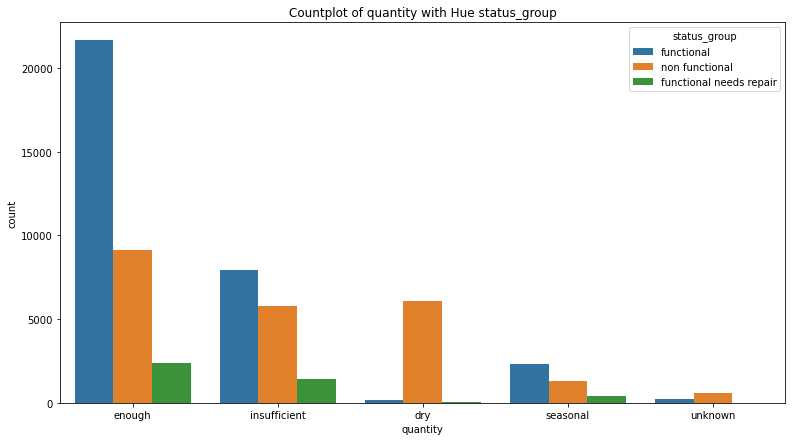

In [13]:
plot_countplot(train_df, x_col='quantity')

From the plot above, we can see that there are wells with 'enough' water but non-functional. We can also get a picture that in 'dry' quantity, most wells are non-functional. This is to mean that if a well is dry, then you can be almost certain that it is non-functional, and if there is enough water in the well, then there's higher chances that it is functional.

This implies a relationship between the quantity of water and the functionality of the wells, suggesting that the availability of water is a key factor influencing whether a well is functional or non-functional

# scheme_management / management / management_group columns

In [14]:
# checking for unique values
get_value_counts('scheme_management')

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [15]:
# checking for unique values
get_value_counts('management')

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

The above two columns, 'management' and 'scheme_management', have almost the same information. We will drop 'scheme_management'.

In [16]:
# checking for unique values
get_value_counts('management_group')

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [17]:
# accessing specific values in the above column
train_df.loc[train_df['management_group']=='user-group']['management'].value_counts() ,train_df.loc[train_df['management_group']=='commercial']['management'].value_counts() 

(vwc            40507
 wug             6515
 water board     2933
 wua             2535
 Name: management, dtype: int64,
 private operator    1971
 water authority      904
 company              685
 trust                 78
 Name: management, dtype: int64)

To find the subgroups of 'management_group' column, we checked the 'user-group' values and saw that this column is just the grouped version of 'management'. Although 'management' has more detailed values, we decided to drop 'management_group' column.

Grouping the dataframe by 'management_group'and 'management' we see that:

In [18]:
# checking for subgroups of commercial, other, parastartal and user group
train_df.groupby(['management_group','management']).count()

status_group  amount_tsh  date_recorded  \
management_group management                                                  
commercial       company                    685         685            685   
                 private operator          1971        1971           1971   
                 trust                       78          78             78   
                 water authority            904         904            904   
other            other                      844         844            844   
                 other - school              99          99             99   
parastatal       parastatal                1768        1768           1768   
unknown          unknown                    561         561            561   
user-group       vwc                      40507       40507          40507   
                 water board               2933        2933           2933   
                 wua                       2535        2535           2535   
                 wug                       6515        6515           6515   

                                   funder  gps_height  installer  longitude  \
management_group management                                                   
commercial       company              663         685        663        685   
                 private operator    1957        1971       1959       1971   
                 trust                 78          78         78         78   
                 water authority      836         904        836        904   
other            other                837         844        831        844   
                 other - school        99          99         99         99   
parastatal       parastatal          1624        1768       1626       1768   
unknown          unknown              533         561        527        561   
user-group       vwc                37632       40507      37630      40507   
                 water board         2715        2933       2714       2933   
                 wua                 2308        2535       2309       2535   
                 wug                 6483        6515       6473       6515   

                                   latitude  wpt_name  num_private  ...  \
management_group management                                         ...   
commercial       company                685       685          685  ...   
                 private operator      1971      1971         1971  ...   
                 trust                   78        78           78  ...   
                 water authority        904       904          904  ...   
other            other                  844       844          844  ...   
                 other - school          99        99           99  ...   
parastatal       parastatal            1768      1768         1768  ...   
unknown          unknown                561       561          561  ...   
user-group       vwc                  40507     40507        40507  ...   
                 water board           2933      2933         2933  ...   
                 wua                   2535      2535         2535  ...   
                 wug                   6515      6515         6515  ...   

                                   water_quality  quality_group  quantity  \
management_group management                                                 
commercial       company                     685            685       685   
                 private operator           1971           1971      1971   
                 trust                        78             78        78   
                 water authority             904            904       904   
other            other                       844            844       844   
                 other - school               99             99        99   
parastatal       parastatal                 1768           1768      1768   
unknown          unknown                     561            561       561   
user-group    

# source / source_type / source_class columns

In [19]:
# checking for unique values
get_value_counts('source')

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [20]:
# checking for unique values
get_value_counts('source_type')

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [21]:
# checking for unique values
get_value_counts('source_class')

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

We can see that the above columns have duplicate information, so we retain only 'source' column.

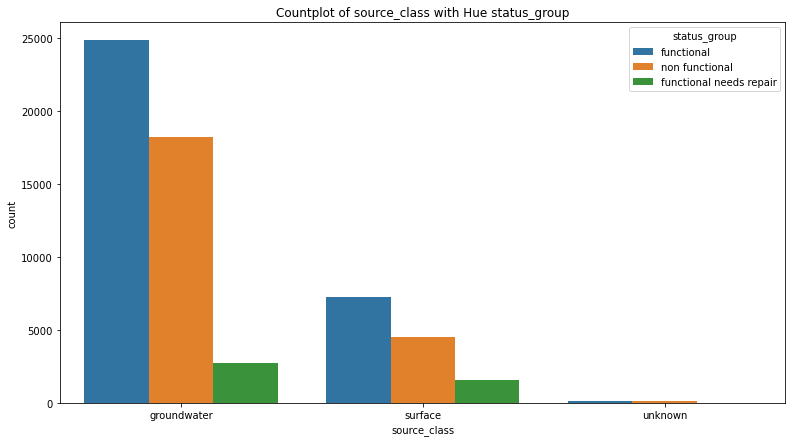

In [22]:
plot_countplot(train_df, x_col='source_class')

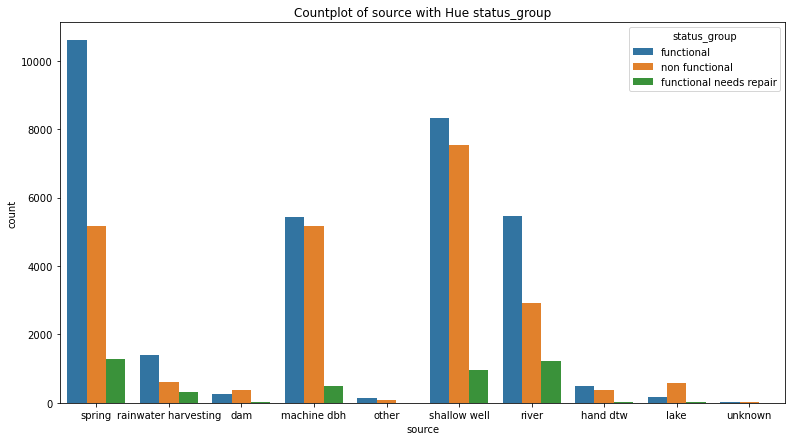

In [23]:
plot_countplot(train_df, x_col='source')

Its quite evident that most wells are functional when plotted against the source.

# payment / payment_type columns

In [24]:
# checking for unique values
get_value_counts('payment')

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [25]:
# checking for unique values
get_value_counts('payment_type')

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

The two columns are also similar so we drop one.

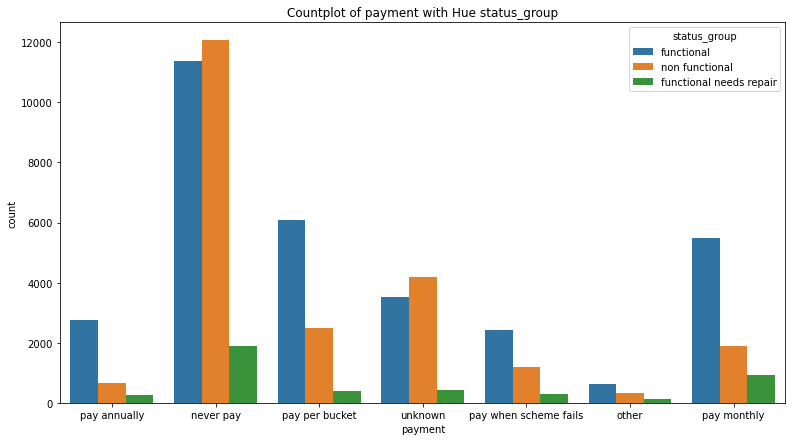

In [26]:
plot_countplot(train_df, x_col='payment')

We can clearly see that where payment is made, there is a higher count of functional wells to non-functional. Whereas in cases where payment isn't made or we have unknown payment, we see that there is a high number of non-functional wells.

This suggests that there is a relationship between payment and the functionality of wells. It could be that payment is associated with better maintenance or higher-quality wells, leading to increased functionality. 

# extraction_type / extraction_type_group / extraction_type_class columns

In [27]:
# checking for unique values
get_value_counts('extraction_type')

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [28]:
# checking for unique values
get_value_counts('extraction_type_group')

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [29]:
# checking for unique values
get_value_counts('extraction_type_class')

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [30]:
# to see sub-groups in extraction_type_clas based on extraction_type_group
train_df.groupby(['extraction_type_class', 'extraction_type_group']).count()

status_group  amount_tsh  \
extraction_type_class extraction_type_group                             
gravity               gravity                       26780       26780   
handpump              afridev                        1770        1770   
                      india mark ii                  2400        2400   
                      india mark iii                   98          98   
                      nira/tanira                    8154        8154   
                      other handpump                  364         364   
                      swn 80                         3670        3670   
motorpump             mono                           2865        2865   
                      other motorpump                 122         122   
other                 other                          6430        6430   
rope pump             rope pump                       451         451   
submersible           submersible                    6179        6179   
wind-powered          wind-powered                    117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26780        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                      other handpump              364       364          364   
                      swn 80              

We keep 'extraction_type_group' and drop the rest to reduce duplicate values.

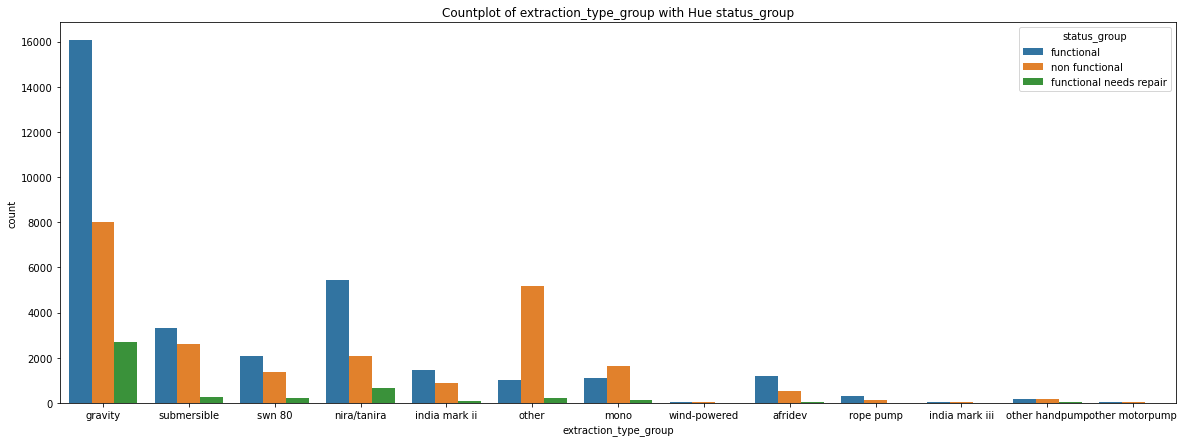

In [31]:
plot_countplot(train_df, x_col='extraction_type_group',fig_size=(20,7))

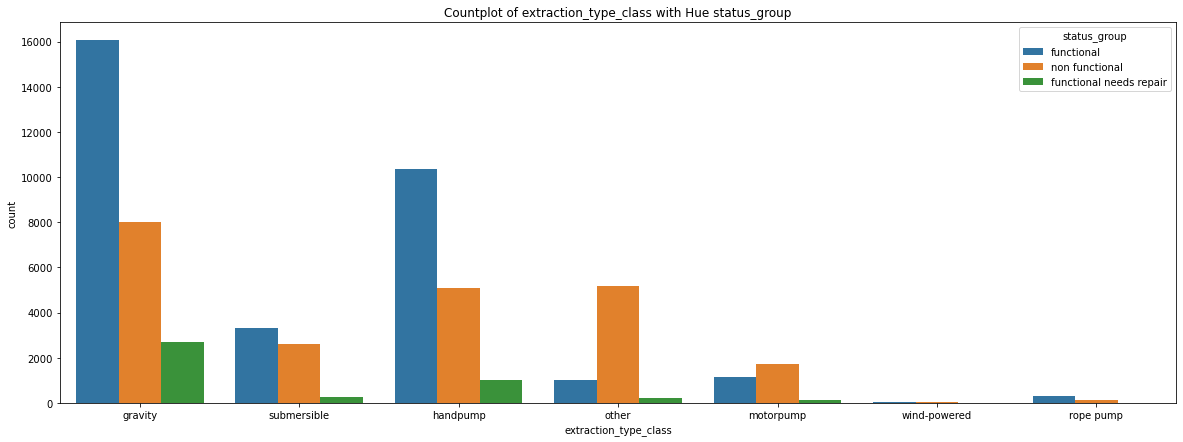

In [32]:
plot_countplot(train_df, x_col='extraction_type_class',fig_size=(20,7))

In almost all the major extraction types(gravity, submersible and handpump), we have more functional wells.

There is a consistent trend of having more functional wells, meaning, functionality does not seem to vary significantly with the extraction type. instead, the prevalence of functional wells appears to be a common characteristic across these extraction methods, save for 'motorpump' and 'other'.

# waterpoint_type / waterpoint_type_group

In [33]:
# checking for unique values
get_value_counts('waterpoint_type')

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [34]:
# checking for unique values
get_value_counts('waterpoint_type_group')

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We will keep 'waterpoint_type' which contains more detail.

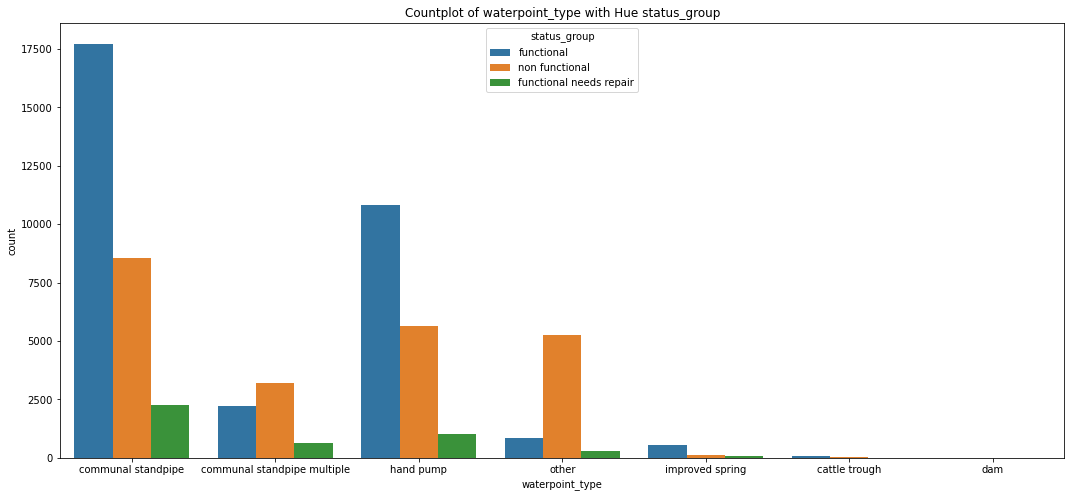

In [35]:
plot_countplot(train_df, x_col='waterpoint_type', fig_size=(18,8))

Most handpump and communal standpipes water point types are functional.

# construction_year column

In [36]:
# checking for unique values
get_value_counts('construction_year')

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [37]:
#create a new column called decade
train_df['decade'] = train_df['construction_year']

In [38]:
# subdividing the 'decade' column
train_df['decade'] = np.where(train_df['construction_year'] == 0, '0', pd.cut(train_df['construction_year'],
                                                                    bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020],
                                                                    labels=['1960', '1970', '1980', '1990', '2000', '2010'],
                                                                    right=False))

In [39]:
# checking for unique values
get_value_counts('decade')

0       20709
2000    15330
1990     7678
1980     5578
2010     5161
1970     4406
1960      538
Name: decade, dtype: int64

In [40]:
#changing the missing values in construction year column
train_df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

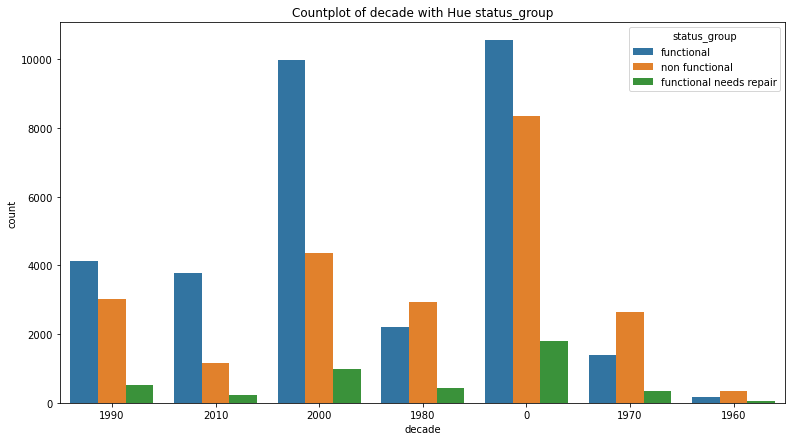

In [41]:
plot_countplot(train_df, x_col='decade')

The observation implies that there may be a positive relationship between newer pumps (built in the new millennium) and functionality; that is, newer pumps are more likely to be functional.

This might suggest that advancements in technology or construction methods over time have contributed to the improved functionality of newer wells. 

# water_quality / quality_group columns

In [42]:
# checking for unique values
get_value_counts('water_quality')

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [43]:
# checking for unique values
get_value_counts('quality_group')

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'

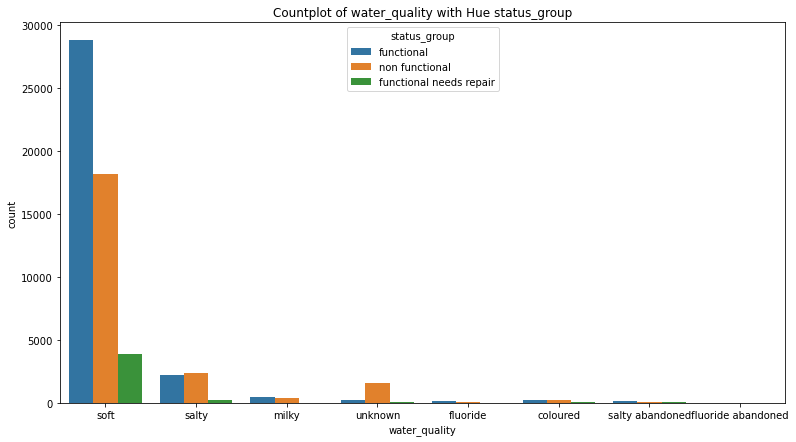

In [44]:
plot_countplot(train_df, x_col='water_quality')

We can see that even in wells with soft, good quality water, we still have non-functional wells. Where wells are salty, most are non-functional.

# recorded_by column

In [45]:
# checking for unique values
get_value_counts('recorded_by')

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

This column has only one value so we will drop it will have no effect in our prediction.

# installer column

In [46]:
#checking for nulls
train_df['installer'].isna().sum()

3655

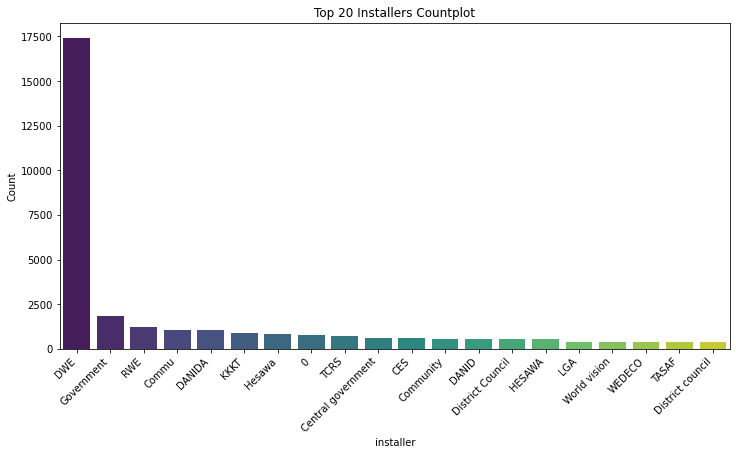

In [47]:
# function for top installers
def plot_countplot2(df, x_col, top_n=20):
    # Get the top n installers
    top_installers = df[x_col].value_counts().nlargest(top_n).index

    # Filter df for the top installers
    df_top = df[df[x_col].isin(top_installers)]

    # Create a countplot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_top, x=x_col, order=top_installers, palette='viridis')
    plt.title(f'Top {top_n} Installers Countplot')
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# plot top 20 installers
plot_countplot2(train_df, x_col='installer', top_n=20)

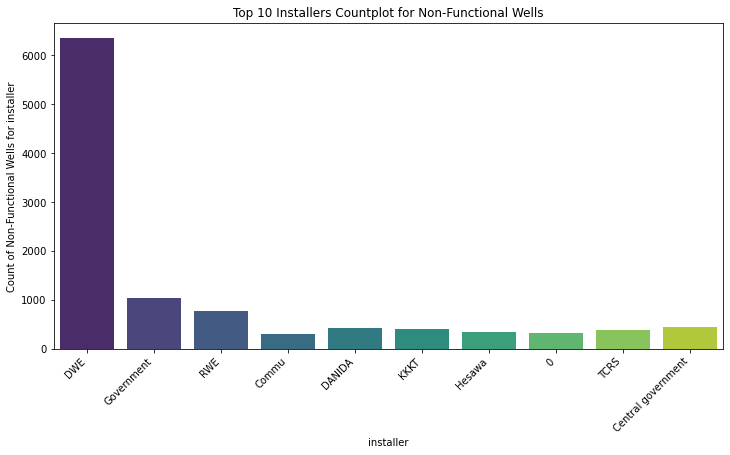

In [48]:
def plot_countplot3(df, x_col, target_col, top_n=10):
    # Get the top N installers
    top_installers = df[x_col].value_counts().nlargest(top_n).index

    # Filter the DataFrame for the top installers and non-functional instances
    df_top = df[df[x_col].isin(top_installers) & (df[target_col] == 'non functional')]

    # Create a countplot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_top, x=x_col, order=top_installers, palette='viridis')
    plt.title(f'Top {top_n} Installers Countplot for Non-Functional Wells')
    plt.xlabel(x_col)
    plt.ylabel(f'Count of Non-Functional Wells for {x_col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Assuming 'status_group' is the column representing the target variable
# Replace it with the actual column name in your DataFrame
target_column = 'status_group'

# plot top 10 installers for non-functional wells
plot_countplot3(train_df, x_col='installer', target_col=target_column, top_n=10)

This column however has lots of null values, so we can drop it.

# funder column

In [49]:
train_df['funder'].isna().sum()

3635

This column has lots of null values, so we can drop it.

# Latitude and Longitude

In [50]:
# Create a map
tanzania = folium.Map()

# Create a dictionary to map status_group to color
status_color = {'functional': 'blue', 'non functional': 'red', 'functional needs repair': 'orange'}

# Loop through unique status groups and plot points
for status_group in train_df['status_group'].unique():
    df_status = train_df[train_df['status_group'] == status_group]
    lat_long = [(lat, long) for lat, long in zip(df_status['latitude'], df_status['longitude'])]

    # Plot points on the map
    for coord in lat_long[::5]:
        folium.CircleMarker(location=[coord[0], coord[1]], opacity=0.6, color=status_color[status_group], radius=1).add_to(tanzania)

# Set the zoom to fit the bounds
tanzania.fit_bounds(tanzania.get_bounds())
tanzania

# wpt_name / scheme_name columns

In [51]:
# checking for unique values
get_value_counts('wpt_name').nunique()

76

In [52]:
# checking for unique values
get_value_counts('scheme_name').nunique()

107

Drop the two columns above.

# region/ region_code columns

In [53]:
# checking for unique values
get_value_counts('region_code')

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [54]:
# checking for unique values
get_value_counts('region')

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

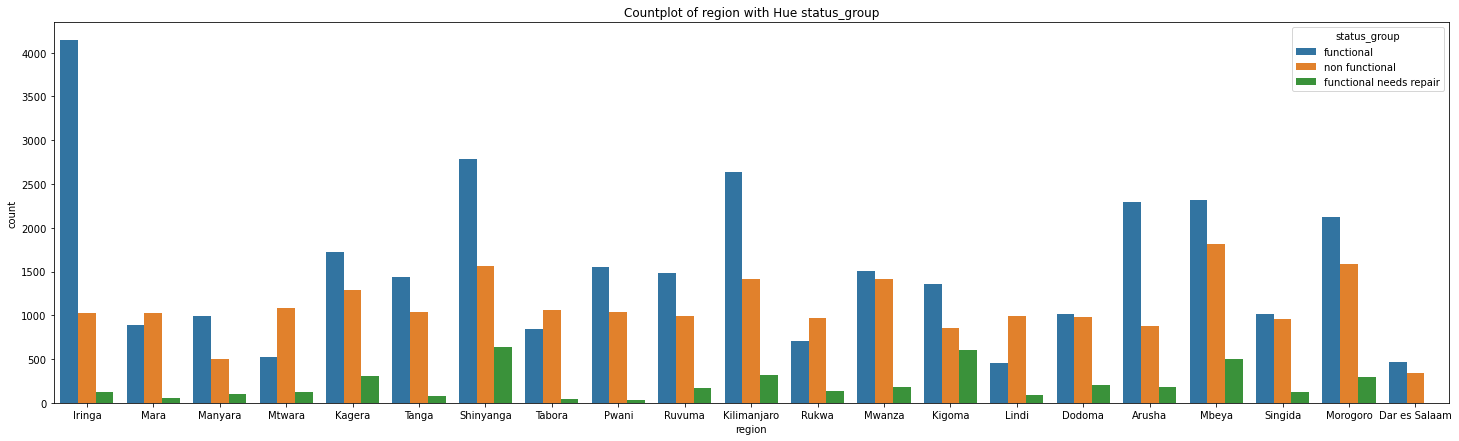

In [55]:
plot_countplot(train_df, x_col='region', hue_col= 'status_group', fig_size=(25,7))

In the majority of areas, it is evident that a significant proportion of wells are operational. However, in specific regions such as Mara, Mwara, Tabora, and Lindi, there is a higher prevalence of non-functional wells. Additionally, despite having a higher overall number of functional wells, regions like Kagera, Shinyanga, Kilimanjaro, Mwanza, Mbeya, and Morogoro exhibit a notable number of non-functional wells.

Checking Tanzania's largest city and financial hub, Dar es Salaam, we see:

In [56]:
result_df = train_df[train_df['region'] == 'Dar es Salaam'].groupby(['water_quality', 'status_group']).size().reset_index(name='count')
result_df

water_quality             status_group  count
0   fluoride abandoned           non functional      2
1                milky               functional      1
2                milky           non functional      1
3                salty               functional     41
4                salty           non functional    100
5      salty abandoned               functional     63
6      salty abandoned           non functional     37
7                 soft               functional    352
8                 soft  functional needs repair      3
9                 soft           non functional    186
10             unknown               functional      4
11             unknown           non functional     15

We can see that even in the most populated region of the country, which is also one of the capitals, there is still lots of non-functional wells.

# amount_tsh column

In [57]:
# checking for unique values
get_value_counts('amount_tsh').nunique()

50

# gps_height column

In [58]:
train_df.groupby('status_group')[['gps_height']].mean()

gps_height
status_group                       
functional               740.131188
functional needs repair  627.607135
non functional           574.464774

In [59]:
# checking for unique values
get_value_counts('gps_height')/get_value_counts('gps_height').nunique()

 0       385.622642
-15        1.132075
-16        1.037736
-13        1.037736
-20        0.981132
            ...    
 2285      0.018868
 2424      0.018868
 2552      0.018868
 2413      0.018868
 2385      0.018868
Name: gps_height, Length: 2428, dtype: float64

Gps height shows the level of the water point from sea level. We can see 0 values but we'll assume they are at sea level.

# population column

In [60]:
# checking for unique values
get_value_counts('population')

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [61]:
train_df.loc[train_df['population']==0].groupby('status_group').count()

amount_tsh  date_recorded  funder  gps_height  \
status_group                                                             
functional                    11274          11274   10048       11274   
functional needs repair        1775           1775    1464        1775   
non functional                 8332           8332    7753        8332   

                         installer  longitude  latitude  wpt_name  \
status_group                                                        
functional                   10033      11274     11274     11274   
functional needs repair       1462       1775      1775      1775   
non functional                7755       8332      8332      8332   

                         num_private  basin  ...  quality_group  quantity  \
status_group                                 ...                            
functional                     11274  11274  ...          11274     11274   
functional needs repair         1775   1775  ...           1775      1775   
non functional                  8332   8332  ...           8332      8332   

                         quantity_group  source  source_type  source_class  \
status_group                                                                 
functional                        11274   11274        11274         11274   
functional needs repair            1775    1775         1775          1775   
non functional                     8332    8332         8332          8332   

                         waterpoint_type  waterpoint_type_group  status  \
status_group                                                              
functional                         11274                  11274   11274   
functional needs repair             1775                   1775    1775   
non functional                      8332                   8332    8332   

                         decade  
status_group                     
functional                11274  
functional needs repair    1775  
non functional             8332  

[3 rows x 41 columns]

In [62]:
train_df['population'].mean()

179.90998316498317

Some functional water points has zero population which is quite weird so we will change 0 population to mean.

In [63]:
#changing 0's to mean
train_df['population'].replace(to_replace = 0 , value =180, inplace=True) 

In [64]:
train_df.sort_values(by='population', ascending=False).head(40).groupby('status_group').count()

amount_tsh  date_recorded  funder  gps_height  \
status_group                                                             
functional                       29             29      28          29   
functional needs repair           4              4       3           4   
non functional                    7              7       7           7   

                         installer  longitude  latitude  wpt_name  \
status_group                                                        
functional                      28         29        29        29   
functional needs repair          3          4         4         4   
non functional                   7          7         7         7   

                         num_private  basin  ...  quality_group  quantity  \
status_group                                 ...                            
functional                        29     29  ...             29        29   
functional needs repair            4      4  ...              4         4   
non functional                     7      7  ...              7         7   

                         quantity_group  source  source_type  source_class  \
status_group                                                                 
functional                           29      29           29            29   
functional needs repair               4       4            4             4   
non functional                        7       7            7             7   

                         waterpoint_type  waterpoint_type_group  status  \
status_group                                                              
functional                            29                     29      29   
functional needs repair                4                      4       4   
non functional                         7                      7       7   

                         decade  
status_group                     
functional                   29  
functional needs repair       4  
non functional                7  

[3 rows x 41 columns]

To see the most populated areas water point functionality , we chose top 40 values and did groupby. It shows that higher population areas have more functional water points.

# date_recorded column

Approximately 95% of the water points were recorded between 2011-2013. So, for now we do not think it contains necessary information about functionality. We drop this column for now.

# num_private column

This column has no information about it and also mostly have zero values. So, we drop this also.

# basin column

In [65]:
# checking for unique values
get_value_counts('basin')

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

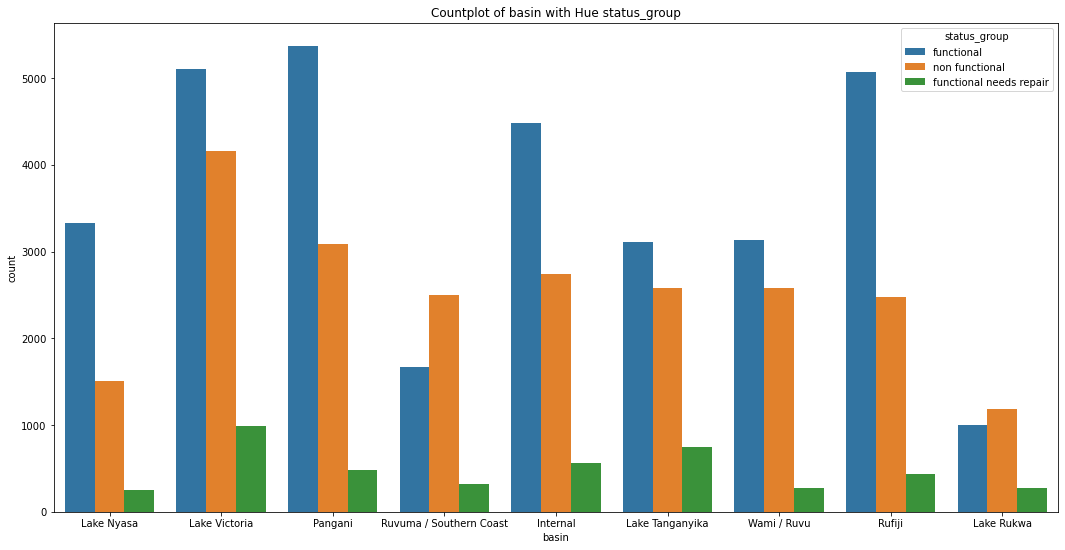

In [66]:
plot_countplot(train_df, x_col='basin', fig_size=(18,9))

This graph shows that there is a correlation between functionality and geographical water basin.

# subvillage column

In [67]:
# checking for unique values
get_value_counts('subvillage')

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
              ... 
Mugurchan        1
Mwabadagija      1
Mwampembee       1
Lusembo          1
Badagi           1
Name: subvillage, Length: 19287, dtype: int64

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this nunique object values.

# district_code column

In [68]:
# checking for unique values
get_value_counts('district_code')

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

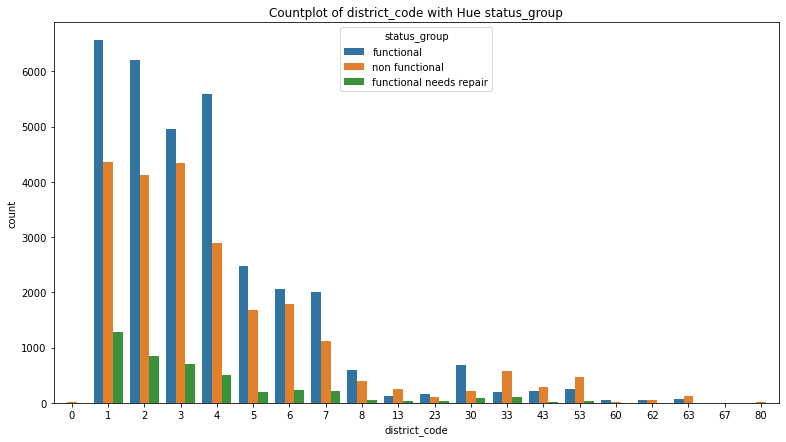

In [69]:
plot_countplot(train_df, x_col='district_code')

Most of the districts have functional wells.

# public_meeting columns

In [70]:
# checking for unique values
get_value_counts('public_meeting')

True     51011
False     5055
Name: public_meeting, dtype: int64

# permit column

In [71]:
# checking for unique values
get_value_counts('permit')

True     38852
False    17492
Name: permit, dtype: int64

This column shows if the water point is permitted or not. 

# Data Preparation

### Dropping all irrelavant features in train_df

In [72]:
# dropping all the irrelavant features
train_df = train_df.drop(['scheme_name', 
                         'num_private', 
                         'lga', 
                         'ward',
                         'recorded_by', 
                         'extraction_type',
                         'extraction_type_class',
                         'management_group',
                         'payment',
                         'water_quality',
                         'quantity',
                         'source',
                         'source_class',
                         'waterpoint_type',
                         'date_recorded',
                         'public_meeting',
                         'scheme_management',
                         'funder',
                         'installer',
                         'wpt_name',
                          'decade',
                         'subvillage'], axis=1)

In [73]:
train_df

status_group  amount_tsh  gps_height  longitude   latitude  \
id                                                                    
69572      functional      6000.0        1390  34.938093  -9.856322   
8776       functional         0.0        1399  34.698766  -2.147466   
34310      functional        25.0         686  37.460664  -3.821329   
67743  non functional         0.0         263  38.486161 -11.155298   
19728      functional         0.0           0  31.130847  -1.825359   
...               ...         ...         ...        ...        ...   
60739      functional        10.0        1210  37.169807  -3.253847   
27263      functional      4700.0        1212  35.249991  -9.070629   
37057      functional         0.0           0  34.017087  -8.750434   
31282      functional         0.0           0  35.861315  -6.378573   
26348      functional         0.0         191  38.104048  -6.747464   

                         basin       region  region_code  district_code  \
id                                                                        
69572               Lake Nyasa       Iringa           11              5   
8776             Lake Victoria         Mara           20              2   
34310                  Pangani      Manyara           21              4   
67743  Ruvuma / Southern Coast       Mtwara           90             63   
19728            Lake Victoria       Kagera           18              1   
...                        ...          ...          ...            ...   
60739                  Pangani  Kilimanjaro            3              5   
27263                   Rufiji       Iringa           11              4   
37057                   Rufiji        Mbeya           12              7   
31282                   Rufiji       Dodoma            1              4   
26348              Wami / Ruvu     Morogoro            5              2   

       population permit  construction_year extraction_type_group  \
id                                                                  
69572         109  False               1999               gravity   
8776          280   True               2010               gravity   
34310         250   True               2009               gravity   
67743          58   True               1986           submersible   
19728         180   True               2000               gravity   
...           ...    ...                ...                   ...   
60739         125   True               1999               gravity   
27263          56   True               1996               gravity   
37057         180  False               2000                swn 80   
31282         180   True               2000           nira/tanira   
26348         150   True               2002           nira/tanira   

        management payment_type quality_group quantity_group  \
id                                                             
69572          vwc     annually          good         enough   
8776           wug    never pay          good   insufficient   
34310          vwc   per bucket          good         enough   
67743          vwc    never pay          good            dry   
19728        other    never pay          good       seasonal   
...            ...          ...           ...            ...   
60739  water board   per bucket          good         enough   
27263          vwc     annually          good         enough   
37057          vwc      monthly      fluoride         enough   
31282          vwc    never pay          good   insufficient   
26348          vwc   on failure         salty         enough   

                source_type waterpoint_type_group  status  
id                                                         
69572                spring    communal standpipe       2  
8776   rainwater harvesting    communal standpipe       2  
34310                   dam    communal standpipe       2  
67743              borehole    communal standpipe       0  
19728  rainwater h

In [74]:
# shows Nan value after initial data cleaning
train_df.isna().sum()

status_group                0
amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region                      0
region_code                 0
district_code               0
population                  0
permit                   3056
construction_year           0
extraction_type_group       0
management                  0
payment_type                0
quality_group               0
quantity_group              0
source_type                 0
waterpoint_type_group       0
status                      0
dtype: int64

In [75]:
# drop all the Nan in our data frame
train_df = train_df.dropna()

In [76]:
# confirm there are no missing data
train_df.isna().sum()

status_group             0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
district_code            0
population               0
permit                   0
construction_year        0
extraction_type_group    0
management               0
payment_type             0
quality_group            0
quantity_group           0
source_type              0
waterpoint_type_group    0
status                   0
dtype: int64

In [77]:
# switch boolean values to integer objects
train_df['permit'] = train_df['permit'].astype(int)

## Date Cleaning Submission Wells

In [78]:
X_submission = X_submission.drop(['scheme_name', 
                         'num_private', 
                         'lga', 
                         'ward',
                         'recorded_by', 
                         'extraction_type',
                         'extraction_type_class',
                         'management_group',
                         'payment',
                         'water_quality',
                         'quantity',
                         'source',
                         'source_class',
                         'waterpoint_type',
                         'date_recorded',
                         'public_meeting',
                         'scheme_management', 
                         'funder',
                         'installer',
                         'wpt_name',
                         'subvillage'], axis=1)

In [79]:
X_submission

id  amount_tsh  gps_height  longitude   latitude  \
0      50785         0.0        1996  35.290799  -4.059696   
1      51630         0.0        1569  36.656709  -3.309214   
2      17168         0.0        1567  34.767863  -5.004344   
3      45559         0.0         267  38.058046  -9.418672   
4      49871       500.0        1260  35.006123 -10.950412   
...      ...         ...         ...        ...        ...   
14845  39307         0.0          34  38.852669  -6.582841   
14846  18990      1000.0           0  37.451633  -5.350428   
14847  28749         0.0        1476  34.739804  -4.585587   
14848  33492         0.0         998  35.432732 -10.584159   
14849  68707         0.0         481  34.765054 -11.226012   

                         basin   region  region_code  district_code  \
0                     Internal  Manyara           21              3   
1                      Pangani   Arusha            2              2   
2                     Internal  Singida           13              2   
3      Ruvuma / Southern Coast    Lindi           80             43   
4      Ruvuma / Southern Coast   Ruvuma           10              3   
...                        ...      ...          ...            ...   
14845              Wami / Ruvu    Pwani            6              1   
14846                  Pangani    Tanga            4              7   
14847                 Internal  Singida           13              2   
14848               Lake Nyasa   Ruvuma           10              2   
14849               Lake Nyasa   Ruvuma           10              3   

       population permit  construction_year extraction_type_group  \
0             321   True               2012                 other   
1             300   True               2000               gravity   
2             500    NaN               2010                 other   
3             250   True               1987                 other   
4              60   True               2000               gravity   
...           ...    ...                ...                   ...   
14845          20   True               1988                  mono   
14846        2960  False               1994           nira/tanira   
14847         200    NaN               2010               gravity   
14848         150   True               2009               gravity   
14849          40   True               2008               gravity   

        management payment_type quality_group quantity_group  \
0       parastatal    never pay          good       seasonal   
1              vwc    never pay          good   insufficient   
2              vwc    never pay          good   insufficient   
3              vwc      unknown          good            dry   
4      water board      monthly          good         enough   
...            ...          ...           ...            ...   
14845          vwc    never pay          good         enough   
14846          vwc     annually         salty   insufficient   
14847          vwc    never pay          good   insufficient   
14848          vwc    never pay          good   insufficient   
14849          vwc    never pay          good            dry   

                source_type waterpoint_type_group  
0      rainwater harvesting                 other  
1                    spring    communal standpipe  
2      rainwater harvesting                 other  
3              shallow well                 other  
4                    spring    communal standpipe  
...                     ...                   ...  
14845            river/lake    communal standpipe  
14846          shallow well             hand pump  
14847                   dam    communal standpipe  
14848            river/lake    communal standpipe  
14849                spring    communal standpipe  

[14850 rows x 19 columns]

In [80]:
#drop nulls and change permit type
X_submission = X_submission.dropna()
X_submission['permit'] = X_submission['permit'].astype(int)
X_submission = X_submission.set_index('id')

X_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14113 entries, 50785 to 68707
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14113 non-null  float64
 1   gps_height             14113 non-null  int64  
 2   longitude              14113 non-null  float64
 3   latitude               14113 non-null  float64
 4   basin                  14113 non-null  object 
 5   region                 14113 non-null  object 
 6   region_code            14113 non-null  int64  
 7   district_code          14113 non-null  int64  
 8   population             14113 non-null  int64  
 9   permit                 14113 non-null  int32  
 10  construction_year      14113 non-null  int64  
 11  extraction_type_group  14113 non-null  object 
 12  management             14113 non-null  object 
 13  payment_type           14113 non-null  object 
 14  quality_group          14113 non-null  object 
 15

# Data Preprocessing

In [81]:
# preping data for train test split
X = train_df.drop(['status_group', 'status'], axis=1)
y = train_df['status']

In [82]:
# splitting the documented well data before preprocessing to preven data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)

In [83]:
# instantiate onehotencoder and stardardscaler
ohe = OneHotEncoder(categories='auto', sparse=False, drop='first')
ss = StandardScaler()

## Preprocessing Training Data

In [84]:
# Use onehotencoder on all the categorical columns
# Extracting categorical columns from X_train
X_train_ohe = X_train.select_dtypes('object')

# Concatenate categorical columns and selected numerical columns (district_code, region_code)
X_train_ohe = pd.concat([X_train_ohe, X_train[['district_code', 'region_code']]], axis=1)

# Initialize and fit the OneHotEncoder
ohe.fit(X_train_ohe)

# Transform the training data using the fitted OneHotEncoder
X_train_transformed = ohe.transform(X_train_ohe)

# Create a dfwith the transformed features 
train_df_transformed = pd.DataFrame(X_train_transformed, columns=ohe.get_feature_names_out(), index=X_train.index)

# Use standard scaler to scale values with the same unit
# Extract numerical columns excluding specific features (district_code, permit, region_code)
X_train_ss = X_train.select_dtypes(exclude='object').drop(['district_code', 'permit', 'region_code'], axis=1)

# Initialize and fit the StandardScaler
ss.fit(X_train_ss)

# Transform the selected numerical features using the fitted StandardScaler
X_train_scaled = ss.transform(X_train_ss)

# Create a DataFrame with the scaled numerical features
train_df1 = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train_ss.columns)

# Extract the 'permit' column
train_df2 = X_train[['permit']]

# Concatenate the cleaned numerical and categorical features
X_train_clean = pd.concat([train_df1, train_df2, train_df_transformed], axis=1)
X_train_clean.head()

amount_tsh  gps_height  longitude  latitude  population  \
id                                                               
15939   -0.113767    1.050852   0.264201  0.808832    0.716136   
17691   -0.117386   -0.977446   0.819024 -0.442569   -0.433806   
16218   -0.117386   -0.718113   0.746185 -0.968710    0.270240   
73214   -0.117386    1.665137   0.631336  0.357763   -0.572269   
23434   -0.117386    0.752403   0.105475 -1.763017   -0.572269   

       construction_year  permit  basin_Lake Nyasa  basin_Lake Rukwa  \
id                                                                     
15939           1.084350       1               0.0               0.0   
17691           0.197750       0               0.0               0.0   
16218          -1.279916       1               0.0               0.0   
73214          -1.279916       1               0.0               0.0   
23434           0.197750       1               1.0               0.0   

       basin_Lake Tanganyika  ...  region_code_18  region_code_19  \
id                            ...                                   
15939                    0.0  ...             0.0             0.0   
17691                    0.0  ...             0.0             0.0   
16218                    0.0  ...             0.0             0.0   
73214                    0.0  ...             0.0             0.0   
23434                    0.0  ...             0.0             0.0   

       region_code_20  region_code_21  region_code_24  region_code_40  \
id                                                                      
15939             0.0             0.0             1.0             0.0   
17691             0.0             0.0             0.0             0.0   
16218             0.0             0.0             0.0             0.0   
73214             0.0             0.0             0.0             0.0   
23434             0.0             0.0             0.0             0.0   

       region_code_60  region_code_80  region_code_90  region_code_99  
id                                                                     
15939             0.0             0.0             0.0             0.0  
17691             0.0             0.0             0.0             0.0  
16218             0.0             1.0             0.0             0.0  
73214             0.0             0.0             0.0             0.0  
23434             0.0             0.0             0.0             0.0  

[5 rows x 129 columns]

## Preprocessing Test Data

In [85]:
# Use onehotencoder on all the categorical columns for the test dataset
# Extracting categorical columns from X_test
X_test_ohe = X_test.select_dtypes('object')

# Concatenate categorical columns and selected numerical columns (district_code, region_code)
X_test_ohe = pd.concat([X_test_ohe, X_test[['district_code', 'region_code']]], axis=1)

# Transform the test dataset using the fitted OneHotEncoder from training data
X_test_transformed = ohe.transform(X_test_ohe)

# Create a df with the transformed features 
test_df_transformed = pd.DataFrame(X_test_transformed, columns=ohe.get_feature_names_out(), index=X_test.index)

# Use standard scaler to scale values with the same unit for the test dataset
# Extract numerical columns excluding specific features (permit, region_code, district_code)
X_test_ss = X_test.select_dtypes(exclude='object').drop(['permit', 'region_code', 'district_code'], axis=1)

# Transform the selected numerical features using the fitted StandardScaler from training data
X_test_scaled = ss.transform(X_test_ss)

# Create a DataFrame with the scaled numerical features for the test dataset
test_df1 = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test_ss.columns)

# Extract the 'permit' column for the test dataset
test_df2 = X_test[['permit']]

# Concatenate the cleaned numerical and categorical features for the test dataset
X_test_clean = pd.concat([test_df1, test_df2, test_df_transformed], axis=1)
X_test_clean.head()

amount_tsh  gps_height  longitude  latitude  population  \
id                                                               
56668   -0.117386   -0.948470  -5.094958  1.929376   -0.152188   
19460   -0.117386   -0.948470  -0.384628  1.377476   -0.152188   
16751   -0.117386   -0.948470  -0.242919  0.551445   -0.152188   
64787   -0.117386   -0.948470  -5.094958  1.929376   -0.152188   
49128   -0.117386    0.122182   0.522914  0.769453   -0.572269   

       construction_year  permit  basin_Lake Nyasa  basin_Lake Rukwa  \
id                                                                     
56668           0.197750       1               0.0               0.0   
19460           0.197750       1               0.0               0.0   
16751           0.197750       1               0.0               0.0   
64787           0.197750       1               0.0               0.0   
49128           0.591794       1               0.0               0.0   

       basin_Lake Tanganyika  ...  region_code_18  region_code_19  \
id                            ...                                   
56668                    0.0  ...             0.0             1.0   
19460                    0.0  ...             1.0             0.0   
16751                    1.0  ...             0.0             0.0   
64787                    0.0  ...             0.0             1.0   
49128                    0.0  ...             0.0             0.0   

       region_code_20  region_code_21  region_code_24  region_code_40  \
id                                                                      
56668             0.0             0.0             0.0             0.0   
19460             0.0             0.0             0.0             0.0   
16751             0.0             0.0             0.0             0.0   
64787             0.0             0.0             0.0             0.0   
49128             0.0             0.0             0.0             0.0   

       region_code_60  region_code_80  region_code_90  region_code_99  
id                                                                     
56668             0.0             0.0             0.0             0.0  
19460             0.0             0.0             0.0             0.0  
16751             0.0             0.0             0.0             0.0  
64787             0.0             0.0             0.0             0.0  
49128             0.0             0.0             0.0             0.0  

[5 rows x 129 columns]

## Preprocessing Submission Data

In [86]:
# Create a copy of the submission dataset
x_sub = X_submission.copy()

# Extract categorical columns for the submission dataset
x_sub_ohe = x_sub.select_dtypes('object')

# Concatenate categorical columns and selected numerical columns (district_code, region_code)
x_sub_ohe = pd.concat([x_sub_ohe, x_sub[['district_code', 'region_code']]], axis=1)

# Transform the submission dataset using the fitted OneHotEncoder from training data
x_sub_transformed = ohe.transform(x_sub_ohe)

# Create a DataFrame with the transformed features
submission_df = pd.DataFrame(x_sub_transformed, columns=ohe.get_feature_names_out(), index=x_sub.index)

# Extract numerical columns excluding specific features (permit, region_code, district_code) for the submission dataset
x_sub_ss = x_sub.select_dtypes(exclude='object').drop(['permit', 'region_code', 'district_code'], axis=1)

# Transform the selected numerical features using the fitted StandardScaler from training data for the submission dataset
x_sub_scaled = ss.transform(x_sub_ss)

# Create a df with the scaled numerical features for the submission dataset
sub_df1 = pd.DataFrame(x_sub_scaled, index=x_sub.index, columns=x_sub_ss.columns)

# Extract the 'permit' column for the submission dataset
sub_df2 = x_sub[['permit']]

# Concatenate the cleaned numerical and categorical features for the submission dataset
submission_clean = pd.concat([sub_df1, sub_df2, submission_df], axis=1)
submission_clean.head()

amount_tsh  gps_height  longitude  latitude  population  \
id                                                               
50785   -0.117386    1.943303   0.184072  0.554164    0.178714   
51630   -0.117386    1.324672   0.388394  0.808388    0.129431   
45559   -0.117386   -0.561645   0.598015 -1.261176    0.012090   
49871    0.063536    0.876998   0.141489 -1.780050   -0.433806   
52449   -0.117386    1.492731   0.392668  0.810689   -0.105252   

       construction_year  permit  basin_Lake Nyasa  basin_Lake Rukwa  \
id                                                                     
50785           1.379883       1               0.0               0.0   
51630           0.197750       1               0.0               0.0   
45559          -1.082894       1               0.0               0.0   
49871           0.197750       1               0.0               0.0   
52449          -0.787361       1               0.0               0.0   

       basin_Lake Tanganyika  ...  region_code_18  region_code_19  \
id                            ...                                   
50785                    0.0  ...             0.0             0.0   
51630                    0.0  ...             0.0             0.0   
45559                    0.0  ...             0.0             0.0   
49871                    0.0  ...             0.0             0.0   
52449                    0.0  ...             0.0             0.0   

       region_code_20  region_code_21  region_code_24  region_code_40  \
id                                                                      
50785             0.0             1.0             0.0             0.0   
51630             0.0             0.0             0.0             0.0   
45559             0.0             0.0             0.0             0.0   
49871             0.0             0.0             0.0             0.0   
52449             0.0             0.0             0.0             0.0   

       region_code_60  region_code_80  region_code_90  region_code_99  
id                                                                     
50785             0.0             0.0             0.0             0.0  
51630             0.0             0.0             0.0             0.0  
45559             0.0             1.0             0.0             0.0  
49871             0.0             0.0             0.0             0.0  
52449             0.0             0.0             0.0             0.0  

[5 rows x 129 columns]

# Classification Models

Writing a function to get model classification report and confusion matrix display:

In [87]:
def model_score(model, X, y_predict, y_true):
    # Predictions
    y_predict = model.predict(X)
    
    # Get unique class labels from y_true and y_predict
    classes = sorted(set(y_true) | set(y_predict))
    
    # Print classification report
    report = classification_report(y_true, y_predict, labels=classes, target_names=[str(c) for c in classes])
    print("Classification Report:\n", report)
    
    # Cross-validation score
    cross = cross_val_score(estimator=model, X=X, y=y_true, cv=10).mean()

    # Print cross-validation score
    print(f'Cross Validation Score: {round(cross, 5)}')

    # Confusion matrix plot
    ConfusionMatrixDisplay.from_estimator(model, X, y_true)

# 1st Model - "Dummy" Model

Let's start with a completely "dummy" model, that will always choose the majority class.

Accuracy Score: 0.535894933002041


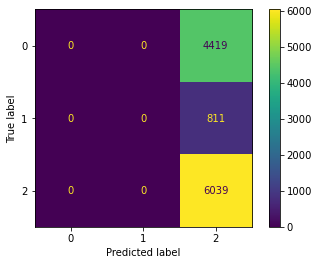

In [88]:
# Create a Dummy Classifier
dummy = DummyClassifier(random_state=42)

# Fit the Dummy Classifier on the cleaned training data
dummy.fit(X_train_clean, y_train)
print(f"Accuracy Score: {dummy.score(X_test_clean, y_test)}")

# Make predictions with dummy classifies
y_pred = dummy.predict(X_test_clean)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot(cmap='viridis');

In [89]:
cv_results = cross_val_score(dummy, X_train, y_train, cv=5)
cv_results.mean()

0.5445812534664449

Create a class to help in cross-validation of models

In [90]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [91]:
dummy_model_results = ModelWithCV(
                        model=dummy,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

CV Results for `dummy` model:
            0.54458 ± 0.00008 accuracy
        


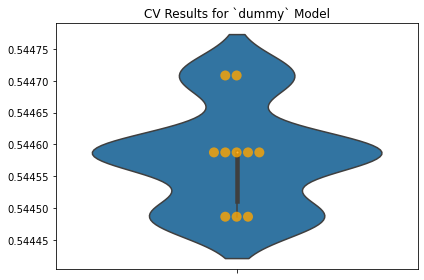

In [92]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

The model is making predictions at a level slightly better than random chance where we would see .333 accuracy. This however is far from the accuracy we aim to achieve. The mean accuracy is a little over 53%, and we also see a loop sided confusion matrix.

# 2nd Model - Logistic Regression

Let's use a logistic regression model and compare its performance.

### - Smote

We will employ smote because as we saw before, our target had extremely unbalanced values, with class 1 being the lowest.

In [93]:
# Instantiating smote
smote = SMOTE(random_state= 42)
# Fitting smote
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clean, y_train)

# LogisticRegression

We're going to specifically avoid any regularization (the default) to see how the model does with little change. So we'll pass 'none' to the penalty parameter to not use any regularization.

In [94]:
logreg = LogisticRegression(random_state = 42,penalty = "none")
logreg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(penalty='none', random_state=42)

In [95]:
simple_logreg_results = ModelWithCV(
                        model=logreg,
                        model_name='simple_logreg',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `simple_logreg` model:
            0.64611 ± 0.00694 accuracy
        


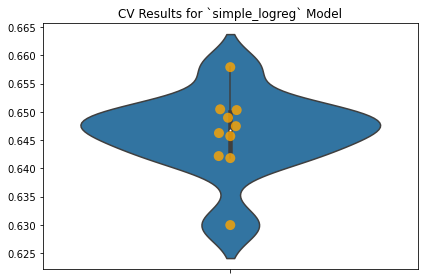

In [96]:
# Saving variable for convenience
model_results = simple_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [97]:
train_accuracy = logreg.score(X_train_resampled, y_train_resampled)
train_accuracy

0.6468679132548445

The mean accuracy is better when the model is actually taking in information from the features instead of always guessing the majority class. Here we see about 65% accuracy.

In [98]:
confusion_matrix(y_train_resampled, logreg.predict(X_train_resampled))

array([[15639,  4253,  4655],
       [ 2533, 16246,  5768],
       [ 2758,  6038, 15751]], dtype=int64)

Text(0.5, 0.98, 'simple logreg model')

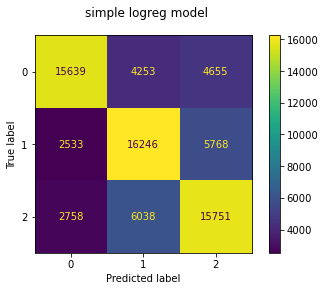

In [99]:
# fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_estimator(
    logreg,
    X_train_resampled,
    y_train_resampled,
    display_labels=logreg.classes_,
    cmap= plt.cm.Blues,
    ax=ax
).plot()

plt.suptitle("simple logreg model")

This model is doing better, but lets improve on it.

# Using Pipeline

In [100]:
# Define the pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced'))
])

# Fit the pipeline on the training data
logreg_pipeline.fit(X_train_clean, y_train)

# Predict on training and test sets
log_training_preds = logreg_pipeline.predict(X_train_clean)
log_test_preds = logreg_pipeline.predict(X_test_clean)

# Accuracy of training and test sets
log_training_accuracy = accuracy_score(y_train, log_training_preds)
log_test_accuracy = accuracy_score(y_test, log_test_preds)

print('Training Accuracy: {:.4}%'.format(log_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(log_test_accuracy * 100))

Training Accuracy: 63.83%
Validation accuracy: 63.79%


In [101]:
log_pipe = ModelWithCV(logreg_pipeline, model_name='log_pipe', X=X_train_resampled, y=y_train_resampled)

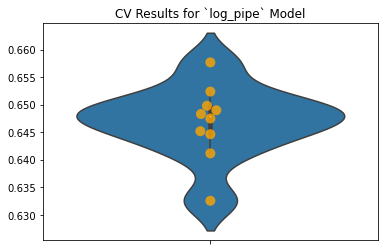

In [102]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax);

The training and validation accuracy scores are close to each other implying very minimal overfitting.

This accuracy does not meet our target thus we use hyperparameter tuning to see if the accuracy will improve

In [103]:
# Creating a parameter grid for logistic regression
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-1, 1, 5)}]

In [104]:
# Create a GridSearchCv
logreg_clf = GridSearchCV(estimator = logreg,
                          param_grid = param_grid,
                          cv = 3, verbose=True, n_jobs=10)

In [105]:
# Fitting using grid search
best_clf = logreg_clf.fit(X_train_resampled,y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [106]:
# Getting the best hyperparameters for our logistic regression 
best_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [107]:
# Instantiating logistic regression model using the best parameters from the grid search
best_logreg = LogisticRegression(random_state = 42,multi_class ="multinomial",
                                 class_weight = "balanced",
                                 C = 0.1,penalty = "l2")

In [108]:
# Fitting the model
best_logreg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   random_state=42)

# Evaluating Tuned Logistic Regression model

In [109]:
def plot_confusion_matrices(model, X_train, y_train, X_test, y_test):
    # Confusion matrix for training data
    y_train_pred = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot(cmap=plt.cm.Blues, values_format=".0f")
    disp_train.ax_.set_title('Confusion Matrix - Training Data')
    plt.show()

    # Confusion matrix for testing data
    y_test_pred = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot(cmap=plt.cm.Blues, values_format=".0f")
    disp_test.ax_.set_title('Confusion Matrix - Testing Data')
    plt.show()

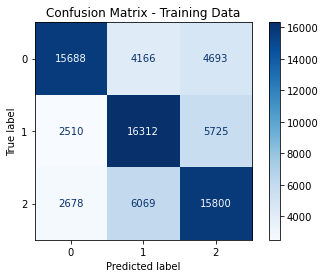

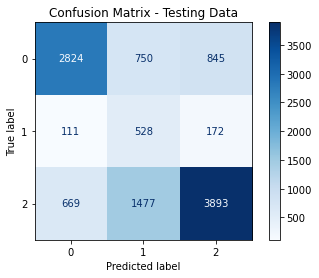

In [110]:
plot_confusion_matrices(best_logreg, X_train_resampled, y_train_resampled, X_test_clean, y_test )

In [111]:
# Predict on training and test sets
best_logreg_training_preds = best_logreg.predict(X_train_resampled)
best_logreg_preds = best_logreg.predict(X_test_clean)


# Accuracy of training and test sets
best_logreg_training_accuracy = accuracy_score(y_train_resampled, best_logreg_training_preds)
best_logreg_test_accuracy = accuracy_score(y_test, best_logreg_preds)

print('Training Accuracy: {:.4}%'.format(best_logreg_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_logreg_test_accuracy * 100))

Training Accuracy: 64.91%
Validation accuracy: 64.29%


In [112]:
# validate logistic regression

#train cross validation
best_logreg_train_cv_score = cross_val_score(best_logreg, X_train_resampled,
                                        y_train_resampled, cv = 5).mean()
print('Train cross validation:', best_logreg_train_cv_score)

#test cross validation
best_logreg_test_cv_score = cross_val_score(best_logreg, X_test_clean, y_test,
                                       cv = 5).mean()
print('Test cross validation:', best_logreg_test_cv_score)

Train cross validation: 0.6471259313981451
Test cross validation: 0.6318216350397046


The tuned logistic regression does not overfit but it doesn't meet our target thus we try another machine learning algorithm

# 3. Decision Tree

We're going to specifically avoid any regularization (the default) to see how the model does with little change.

In [113]:
# Instantiate baseline model
tree_clf = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [114]:
simple_tree_results = ModelWithCV(
                        model=tree_clf,
                        model_name='simple_tree',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `simple_tree` model:
            0.81878 ± 0.02816 accuracy
        


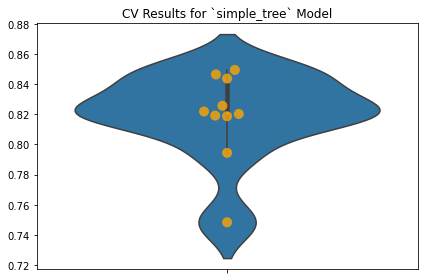

In [115]:
# Saving variable for convenience
model_results = simple_tree_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [116]:
# Predict on the training set
y_hat_train_tree = tree_clf.predict(X_train_resampled)

# Predict on the test set
y_hat_test_tree = tree_clf.predict(X_test_clean)

# Train accuracy
tree_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_tree) * 100
print('Train accuracy: {:.2f}%'.format(tree_train_accuracy))

# Test accuracy
tree_test_accuracy = accuracy_score(y_test, y_hat_test_tree) * 100
print('Test accuracy: {:.2f}%'.format(tree_test_accuracy))

Train accuracy: 99.51%
Test accuracy: 74.94%


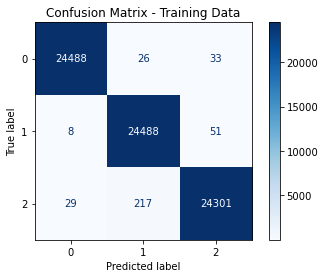

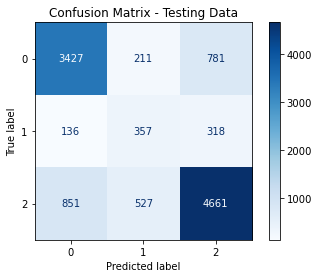

In [117]:
plot_confusion_matrices(tree_clf, X_train_resampled, y_train_resampled, X_test_clean, y_test )

This model is most definitely overfitting as can be seen from the accuracy scores and matrix above.

# Tuned Decision Tree

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [119]:
# initialise decision tree
dtree = DecisionTreeClassifier(random_state= 42)

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [120]:
# Instantiate baseline model
best_tree_clf = DecisionTreeClassifier(random_state=42, 
                                       criterion= 'entropy', 
                                       max_depth= 20, 
                                       max_features= 'sqrt', 
                                       min_samples_leaf= 1,
                                       min_samples_split= 10)

# Fit Decision Tree
best_tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=10, random_state=42)

In [121]:
best_tree_results = ModelWithCV(
                        model=best_tree_clf,
                        model_name='best_tree',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `best_tree` model:
            0.73364 ± 0.02632 accuracy
        


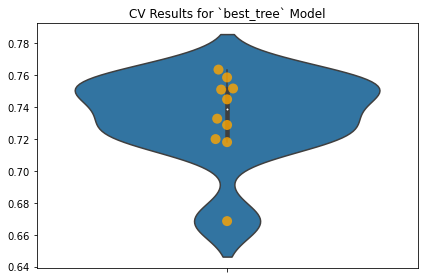

In [122]:
# Saving variable for convenience
model_results = best_tree_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [123]:
# Predict on the training set
y_hat_train_tree = best_tree_clf.predict(X_train_resampled)

# Predict on the test set
y_hat_test_tree = best_tree_clf.predict(X_test_clean)

# Train accuracy
tree_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_tree) * 100
print('Train accuracy: {:.2f}%'.format(tree_train_accuracy))

# Test accuracy
tree_test_accuracy = accuracy_score(y_test, y_hat_test_tree) * 100
print('Test accuracy: {:.2f}%'.format(tree_test_accuracy))

Train accuracy: 78.79%
Test accuracy: 68.39%


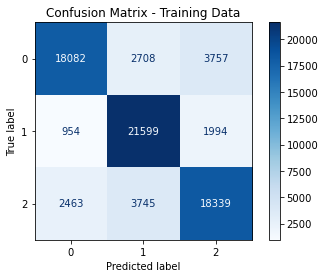

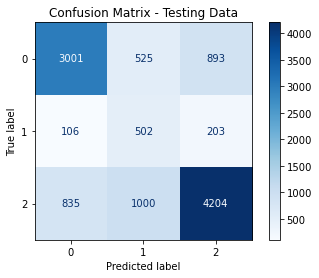

In [124]:
plot_confusion_matrices(best_tree_clf, X_train_resampled, y_train_resampled, X_test_clean, y_test )

This model is still overfitting as can be seen from the accuracy scores and matrix above, even after hyperparemeter tuning.

# 4. KNeighbors Classifier

We're going to specifically avoid any regularization (the default) to see how the model does with little change.

In [125]:
#instantiate knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [126]:
simple_knn_results = ModelWithCV(
                        model=knn,
                        model_name='simple_knn',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `simple_knn` model:
            0.80671 ± 0.01749 accuracy
        


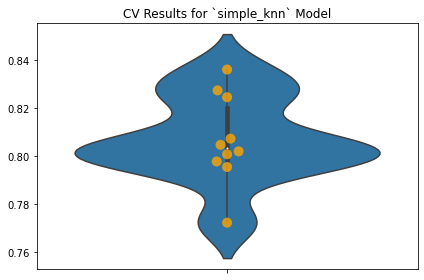

In [127]:
# Saving variable for convenience
model_results = simple_knn_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [128]:
# Predict on the training set
y_hat_train_knn = knn.predict(X_train_resampled)

# Predict on the test set
y_hat_test_knn = knn.predict(X_test_clean)

# Train accuracy
knn_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_knn) * 100
print('Train accuracy: {:.2f}%'.format(knn_train_accuracy))

# Test accuracy
knn_test_accuracy = accuracy_score(y_test, y_hat_test_knn) * 100
print('Test accuracy: {:.2f}%'.format(knn_test_accuracy))

Train accuracy: 86.78%
Test accuracy: 72.97%


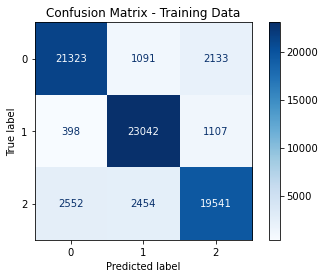

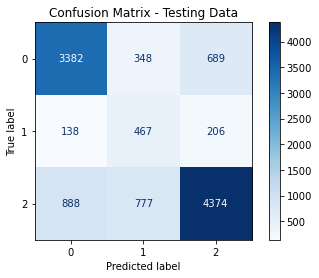

In [129]:
plot_confusion_matrices(knn, X_train_resampled, y_train_resampled, X_test_clean, y_test )

This model is over fitting but has quite okay accuracy and cv scores. Lets tune the hyperparameters.

# Tuning KNN

In [130]:
param_grid = {
    'n_neighbors': [3, 5],  # Adjust the number of neighbors
}

In [131]:
best_knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'n_neighbors': 3}


In [132]:
#instantiate knn
best_knn = KNeighborsClassifier(n_neighbors=3, weights= 'distance')
best_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [133]:
best_knn_results = ModelWithCV(
                        model=best_knn,
                        model_name='best_knn',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `best_knn` model:
            0.83341 ± 0.02386 accuracy
        


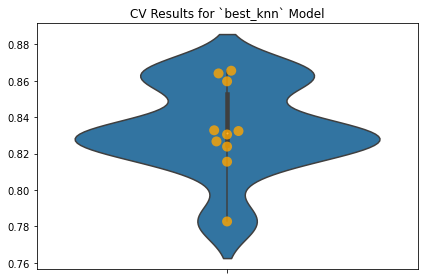

In [134]:
# Saving variable for convenience
model_results = best_knn_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [135]:
# Predict on the training set
y_hat_train_best_knn = best_knn.predict(X_train_resampled)

# Predict on the test set
y_hat_test_best_knn = best_knn.predict(X_test_clean)

# Train accuracy
best_knn_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_best_knn) * 100
print('Train accuracy: {:.2f}%'.format(best_knn_train_accuracy))

# Test accuracy
best_knn_test_accuracy = accuracy_score(y_test, y_hat_test_best_knn) * 100
print('Test accuracy: {:.2f}%'.format(best_knn_test_accuracy))

Train accuracy: 98.96%
Test accuracy: 74.64%


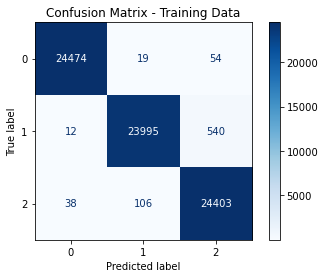

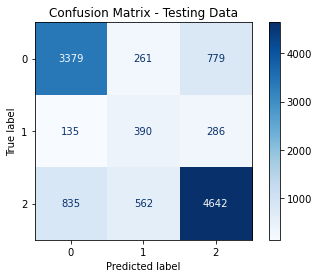

In [136]:
plot_confusion_matrices(best_knn, X_train_resampled, y_train_resampled, X_test_clean, y_test )

The hyperparameter tuned KNeighborsClassifier seems to be overfitting the training data, but the validation accuracy meets our target.

We will use another model to see if the overfitting will reduce.

# 5. Random Forest Classifier

We're going to specifically avoid any regularization (the default) to see how the model does with little change.

In [137]:
# instantiating RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
# Fitting RandomForestClassifier
RF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [138]:
simple_RF_results = ModelWithCV(
                        model=RF,
                        model_name='simple_RF',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `simple_RF` model:
            0.86417 ± 0.03161 accuracy
        


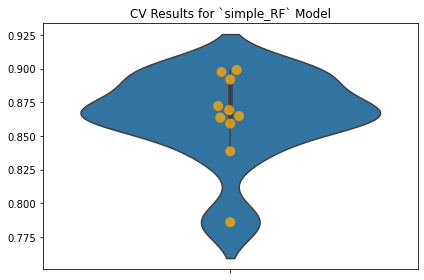

In [139]:
# Saving variable for convenience
model_results = simple_RF_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [140]:
# Predict on the training set
y_hat_train_RF = RF.predict(X_train_resampled)

# Predict on the test set
y_hat_test_RF = RF.predict(X_test_clean)

# Train accuracy
RF_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_RF) * 100
print('Train accuracy: {:.2f}%'.format(RF_train_accuracy))

# Test accuracy
RF_test_accuracy = accuracy_score(y_test, y_hat_test_RF) * 100
print('Test accuracy: {:.2f}%'.format(RF_test_accuracy))

Train accuracy: 99.50%
Test accuracy: 79.02%


This Random forest baseline model is overfitting the training data so we are going to do a grid search to get the best hyperparameters that would reduce overfitting.

# Tuning RF

In [141]:
param_grid = {
    'max_depth': [ 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]
}

In [142]:
best_RF = RandomForestClassifier()

grid_search = GridSearchCV(best_RF, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 2}


In [143]:
# instantiating RandomForestClassifier
best_RF = RandomForestClassifier(random_state=42, max_depth=20, min_samples_split=2)
# Fitting RandomForestClassifier
best_RF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, random_state=42)

In [144]:
best_RF_results = ModelWithCV(
                        model=best_RF,
                        model_name='best_RF',
                        X=X_train_resampled, 
                        y=y_train_resampled
)

CV Results for `best_RF` model:
            0.84495 ± 0.02598 accuracy
        


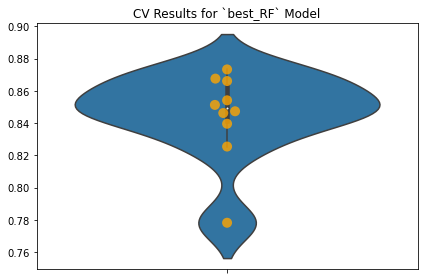

In [145]:
# Saving variable for convenience
model_results = best_RF_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [146]:
# Predict on the training set
y_hat_train_RF = best_RF.predict(X_train_resampled)

# Predict on the test set
y_hat_test_RF = best_RF.predict(X_test_clean)

# Train accuracy
best_RF_train_accuracy = accuracy_score(y_train_resampled, y_hat_train_RF) * 100
print('Train accuracy: {:.2f}%'.format(best_RF_train_accuracy))

# Test accuracy
best_RF_test_accuracy = accuracy_score(y_test, y_hat_test_RF) * 100
print('Test accuracy: {:.2f}%'.format(best_RF_test_accuracy))

Train accuracy: 92.83%
Test accuracy: 77.74%


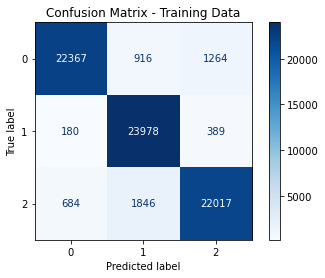

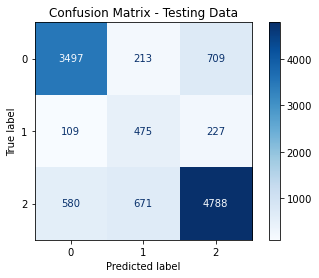

In [147]:
plot_confusion_matrices(best_RF, X_train_resampled, y_train_resampled, X_test_clean, y_test )

The overfitting has reduced but we can still aim for better values.

# Feature importance in RandomForest

In [148]:
best_RF.feature_importances_

array([2.78781829e-02, 5.35672134e-02, 1.03967983e-01, 9.77303728e-02,
       4.27692774e-02, 5.53273364e-02, 1.15290706e-02, 5.89542285e-03,
       3.71276053e-03, 5.97298013e-03, 6.29593599e-03, 3.77245400e-03,
       4.52786860e-03, 3.84618661e-03, 3.44027779e-03, 5.14422760e-04,
       2.64887974e-03, 6.05720927e-03, 2.16874293e-03, 6.28942724e-03,
       2.85401051e-03, 1.32146938e-03, 1.55035865e-03, 1.47680621e-03,
       2.77808998e-03, 2.36233895e-03, 1.67333838e-03, 3.11291074e-03,
       1.96146897e-03, 1.22426154e-03, 1.69704498e-03, 5.85848928e-03,
       1.14595956e-03, 1.41767825e-03, 2.43705103e-03, 2.39456017e-02,
       3.27679757e-03, 2.85331879e-04, 3.97272371e-03, 1.07752609e-02,
       2.63334298e-02, 8.10333931e-04, 1.79048252e-04, 7.12044905e-04,
       7.04963445e-03, 4.61467360e-03, 2.57130992e-04, 1.50941164e-03,
       1.01156150e-04, 2.96364687e-03, 4.39653331e-03, 3.70844863e-04,
       9.05856311e-04, 1.53296650e-02, 1.65889174e-03, 4.92860779e-03,
      

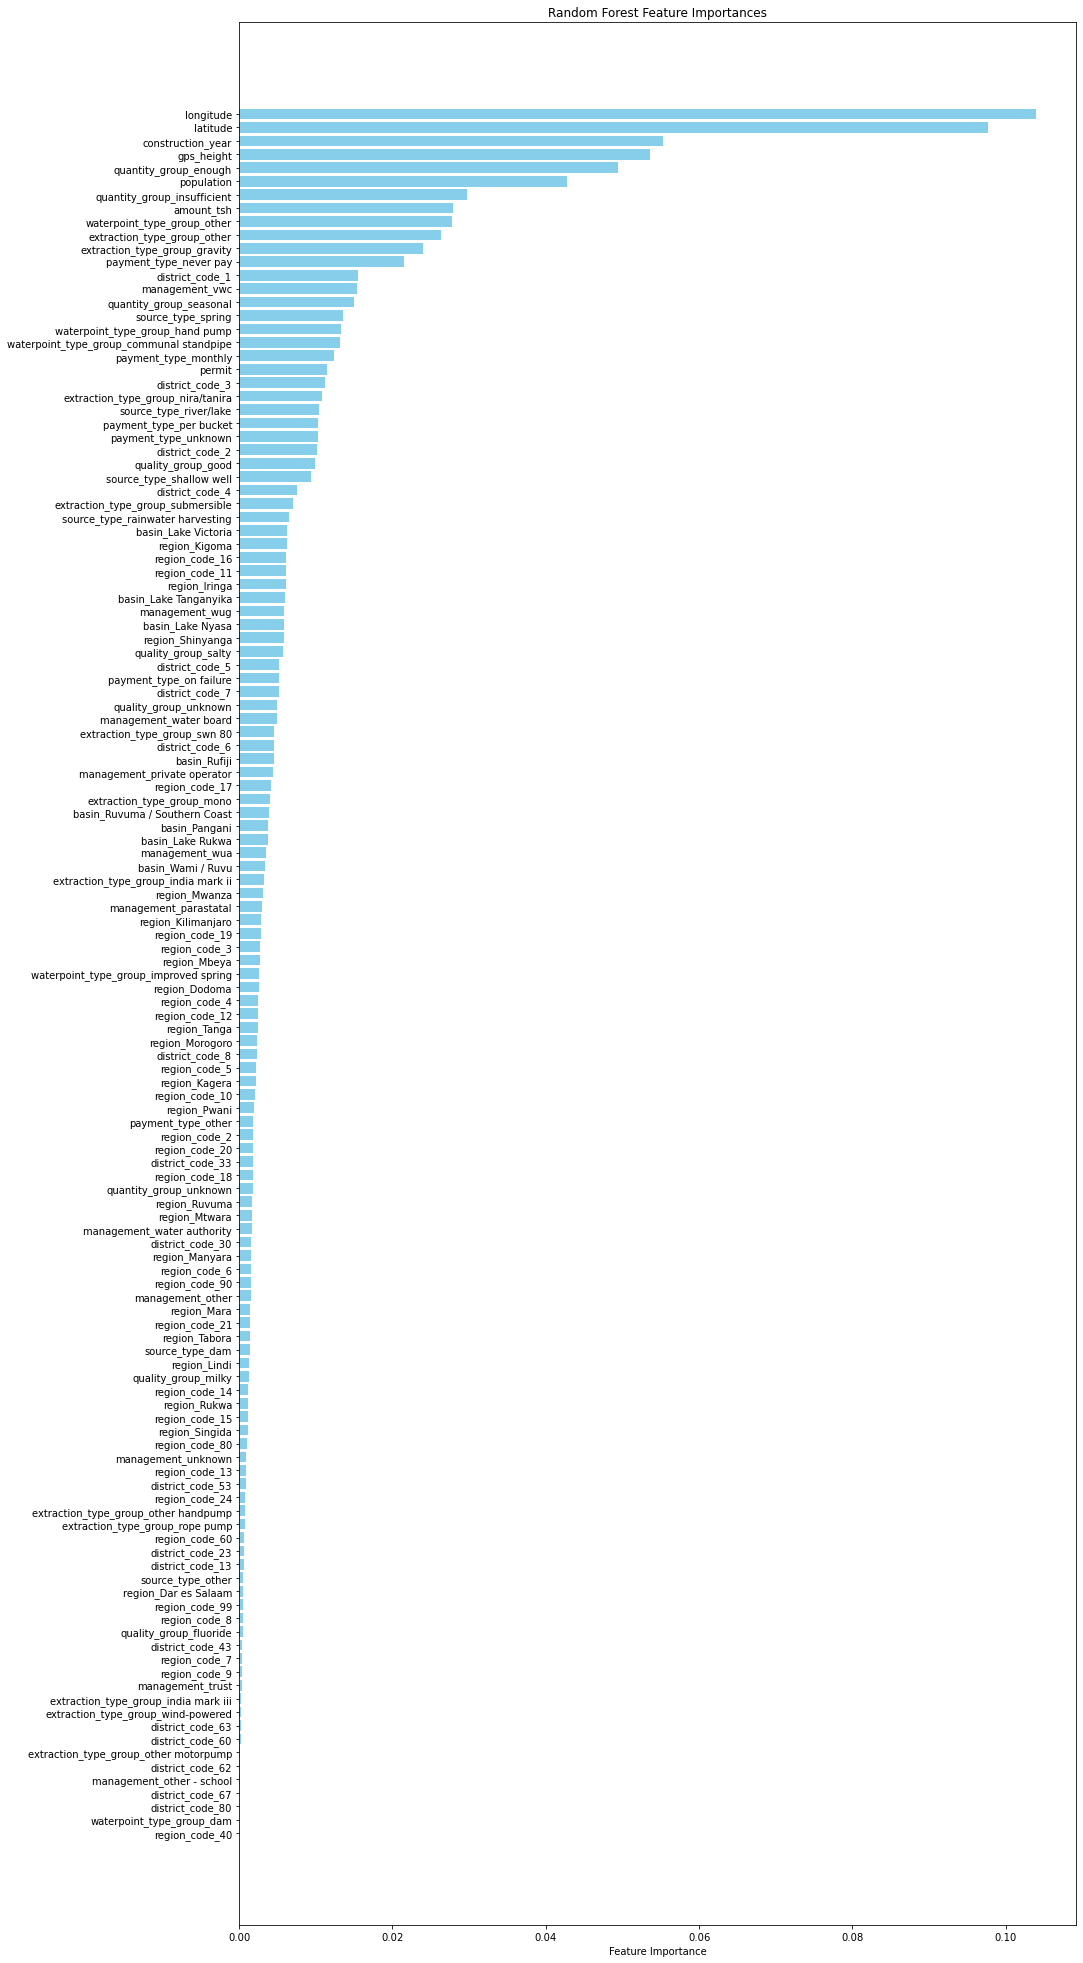

In [149]:
# Assuming best_forest is your trained Random Forest model
sorted_idx = best_RF.feature_importances_.argsort()
feature_importances = best_RF.feature_importances_[sorted_idx]
feature_names = X_train_clean.columns[sorted_idx]

plt.figure(figsize=(15, 35))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color='skyblue')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')

plt.show()

# 6. XGB Classifier

In [150]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [151]:
# Instantiate xgb
xgb_smote = XGBClassifier()
xgb_smote.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
simple_xgb_results = ModelWithCV(
                        model=xgb_smote,
                        model_name='simple_xgb',
                        X=X_train, 
                        y=y_train
)

CV Results for `simple_xgb` model:
            0.81941 ± 0.00383 accuracy
        


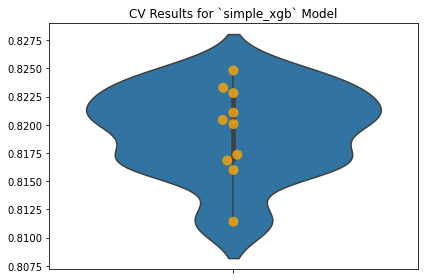

In [153]:
# Saving variable for convenience
model_results = simple_xgb_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [154]:
# Predict on the training set
y_hat_train_xgb = xgb_smote.predict(X_train)

# Predict on the test set
y_hat_test_xgb = xgb_smote.predict(X_test)

# Train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train_xgb) * 100
print('Train accuracy: {:.2f}%'.format(xgb_train_accuracy))

# Test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test_xgb) * 100
print('Test accuracy: {:.2f}%'.format(xgb_test_accuracy))

Train accuracy: 85.84%
Test accuracy: 82.09%


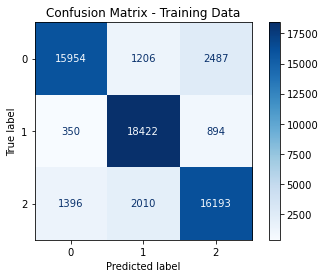

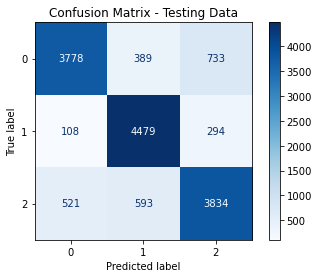

In [155]:
plot_confusion_matrices(xgb_smote, X_train, y_train, X_test, y_test )

This model gives us the best metrics so far and fits our standard well. <br>
Lets try tuning the hyperparameters.

In [156]:
# Instantiate xgb
best_xgb = XGBClassifier(objective = 'multi:softmax',
                      num_class = 3, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=16, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

The hyperparameters chosen above were run one by one before combining them to form one parameter grid because of how run cpu intensive the process is.

In [157]:
best_xgb_results = ModelWithCV(
                        model=best_xgb,
                        model_name='best_xgb',
                        X=X_train, 
                        y=y_train
)

CV Results for `best_xgb` model:
            0.85590 ± 0.00250 accuracy
        


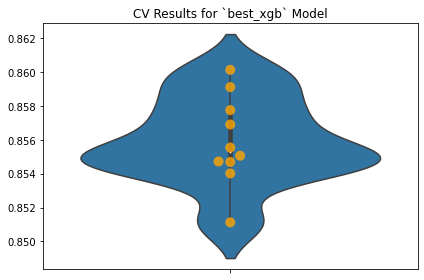

In [158]:
# Saving variable for convenience
model_results = best_xgb_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [159]:
# Predict on the training set
y_hat_train_xgb = best_xgb.predict(X_train)

# Predict on the test set
y_hat_test_xgb = best_xgb.predict(X_test)

# Train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train_xgb) * 100
print('Train accuracy: {:.2f}%'.format(xgb_train_accuracy))

# Test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test_xgb) * 100
print('Test accuracy: {:.2f}%'.format(xgb_test_accuracy))

Train accuracy: 96.95%
Test accuracy: 85.72%


We can that see that this model has the highest accuracy on test data, but is overfitting on the train data. So we revert to the baseline modeline.

# Saving the Model

In [160]:
class ModelHandler:
    def __init__(self, model=None):
        self.model = model

    def save_model(self, file_path):
        if self.model is not None:
            with open(file_path, 'wb') as file:
                pickle.dump(self.model, file)
            print(f"Model saved successfully to {file_path}")
        else:
            print("No model to save. Please set the model first.")

    def load_model(self, file_path):
        try:
            with open(file_path, 'rb') as file:
                self.model = pickle.load(file)
            print(f"Model loaded successfully from {file_path}")
        except Exception as e:
            print(f"Error loading model: {str(e)}")

In [161]:
model_loaded = ModelHandler(model= xgb_smote)
model_loaded.save_model('./model_saved')

Model saved successfully to ./model_saved


In [162]:
# Load the model
model_loaded.load_model('./model_saved')

Model loaded successfully from ./model_saved


In [163]:
# Access the loaded model
loaded_model = model_loaded.model
print(loaded_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Conclusions

The top-performing model is the baseline XGBClassifier, exhibiting a training accuracy of 85.84% and a test accuracy of 82.09%. These results indicate that the model avoids overfitting, supported by a commendable cross-validation score of 0.819. In practical terms, this means that if the model predicts a class as functional, it is likely to be accurate 82% of the time. The selection of this model is based on its ability to generalize effectively to new, unseen data, as it demonstrates minimal overfitting, aligning with our predefined success criteria.

# Recommendations

1.Deploy the baseline XGBClassifier as the preffered model.

2.Hasten to repair non-functional wells which is a high number to avoid multiple concurrent problems.

3.Overstretch the distribution of wells to prevent overpopulation at given areas.

4.The ‘Beast Philanthropy’ org. should utilize the predictive model to develop a strategy for prioritizing waterpoints according to needs.

# Next Steps

To improve the model, maintenance records should be integrated to reflect repairs made to the waterpoints, to prevent the same waterpoints from being classified as needing repairs year after year.

Additional classifiers can be used to determine which non-functional waterpoints to prioritize for maintenance